<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

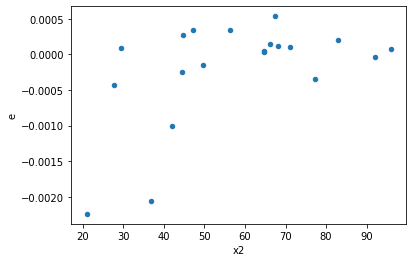

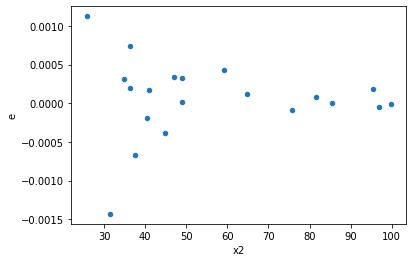

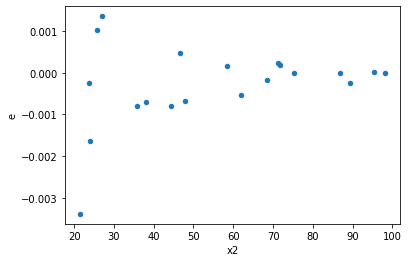

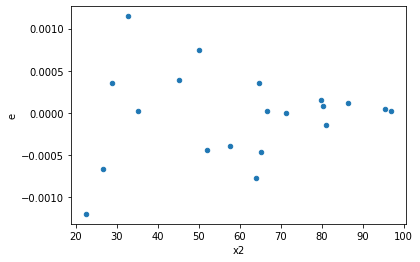

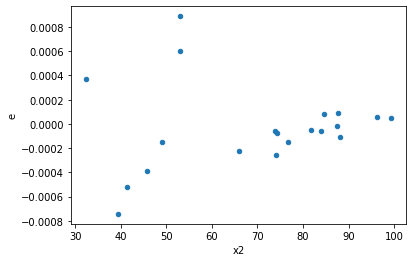

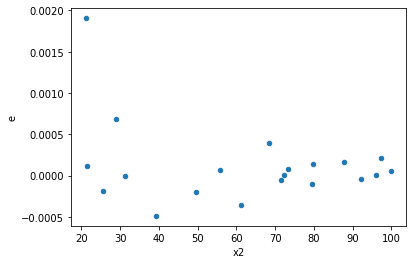

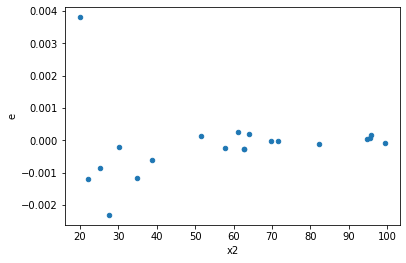

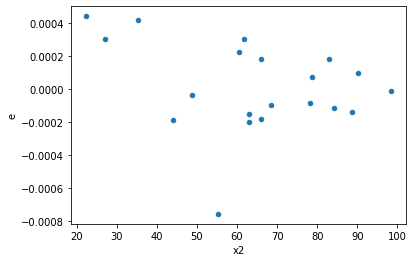

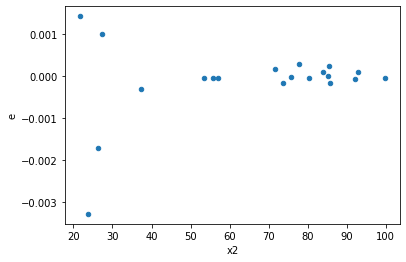

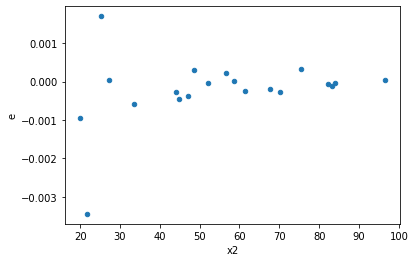

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,3.0,9.0,3.1818938919153885e-07,2.7748505405283877e-06,1.0606312973051294e-07,3.083167267253764e-07,2.9069171116178913,0.18716437725743496,0.9064178113712825,0.09358218862871748,Reject005=1 : Homoscedasticity
3.0,10.0,2.0,3.642340394842589e-07,1.8451846924617465e-06,3.642340394842589e-08,9.225923462308733e-07,25.329657478944796,0.07712239874255689,0.9614388006287216,0.03856119937127844,Reject005=1 : Homoscedasticity
11.0,1.0,14.0,0.0,2.7279114735369687e-06,0.0,1.948508195383549e-07,inf,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
22.0,9.0,3.0,6.565805912019617e-07,8.874678566191782e-07,7.295339902244019e-08,2.958226188730594e-07,4.054953200769514,0.276521437405727,0.8617392812971365,0.1382607187028635,Reject005=1 : Homoscedasticity
27.0,1.0,12.0,2.8757450983288853e-25,2.4395675790706423e-06,2.8757450983288853e-25,2.0329729825588685e-07,7.069378241278209e+17,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
28.0,6.0,6.0,2.1055259930056543e-07,1.781104810160775e-06,3.5092099883427573e-08,2.968508016934625e-07,8.45919174627825,0.020041499652887262,0.9899792501735564,0.010020749826443631,Reject005=0 : Heteroscedasticity
29.0,9.0,3.0,8.953809428843302e-07,1.0095147743489864e-05,9.948677143159224e-08,3.3650492478299546e-06,33.82408735762206,0.01465910839816953,0.9926704458009152,0.007329554199084765,Reject005=0 : Heteroscedasticity
31.0,6.0,6.0,1.7138220885507357e-07,2.888832025644248e-06,2.8563701475845594e-08,4.814720042740414e-07,16.856078848225952,0.003224453456383003,0.9983877732718085,0.0016122267281915015,Reject005=0 : Heteroscedasticity
32.0,5.0,7.0,1.5721900589437065e-07,7.321100829169638e-07,3.144380117887413e-08,1.0458715470242339e-07,3.3261613030644477,0.14850802596724844,0.9257459870163758,0.07425401298362422,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,2.0,1.523316583411766e-05,1.308933486104562e-06,1.523316583411766e-06,6.54466743052281e-07,0.4296327829547253,0.29585601105168213,Reject005=1 : Homoscedasticity
1.0,3.0,9.0,3.1818938919153885e-07,2.7748505405283877e-06,1.0606312973051294e-07,3.083167267253764e-07,2.9069171116178913,0.18716437725743496,Reject005=1 : Homoscedasticity
2.0,10.0,2.0,5.188620236784274e-07,4.42394417239154e-09,5.188620236784274e-08,2.21197208619577e-09,0.042631219577686286,0.00033491559809653527,Reject005=0 : Heteroscedasticity
3.0,10.0,2.0,3.642340394842589e-07,1.8451846924617465e-06,3.642340394842589e-08,9.225923462308733e-07,25.329657478944796,0.07712239874255689,Reject005=1 : Homoscedasticity
4.0,9.0,3.0,1.8756800569583148e-05,1.9810027574194353e-08,2.0840889521759053e-06,6.603342524731451e-09,0.003168455222526463,3.930981083921728e-09,Reject005=0 : Heteroscedasticity
5.0,6.0,6.0,2.2567771125362165e-06,1.0254343266454092e-06,3.7612951875603606e-07,1.709057211075682e-07,0.45437997441094363,0.35979544465713975,Reject005=1 : Homoscedasticity
6.0,7.0,5.0,1.3536575420988004e-05,3.4623732345850183e-07,1.933796488712572e-06,6.924746469170037e-08,0.03580907561674288,0.0003486292038860355,Reject005=0 : Heteroscedasticity
7.0,3.0,9.0,1.9668388888384385e-06,1.5778147310907241e-06,6.556129629461462e-07,1.7531274789896934e-07,0.2674028089852915,0.30535812076264773,Reject005=1 : Homoscedasticity
8.0,10.0,2.0,2.8023814908412808e-06,1.8615047091185778e-07,2.802381490841281e-07,9.307523545592889e-08,0.33212906865149006,0.1894434154185606,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    528
Reject005=1 : Homoscedasticity      472
Name: Result_test, dtype: int64